## 十分钟入门 Pandas

In [1]:
# learn_pandas
#
# created by LuYF-Lemon-love on November 27, 2022
#
# 参考文档链接: https://www.pypandas.cn/docs/getting_started/10min.html

## 导入 Pandas 与 NumPy

In [2]:
import numpy as np
import pandas as pd

## 生成对象

用**列表**生成 **Series** 时，**Pandas** 默认**自动生成整数索引**：

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

用含**日期时间索引**与**标签 (列名)**的 **NumPy 数组**生成 **DataFrame** ：

In [4]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize: 'bool' = False, name: 'Hashable' = None, closed=None, **kwargs) -> 'DatetimeIndex'
    Return a fixed frequency DatetimeIndex.
    
    Returns the range of equally spaced time points (where the difference between any
    two adjacent points is specified by the given frequency) such that they all
    satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
    the first and last time points in that range that fall on the boundary of ``freq``
    (if given as a frequency string) or that are valid for ``freq`` (if given as a
    :class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
    ``end``, or ``freq`` is *not* specified, this missing parameter can be computed
    given ``periods``, the number of timesteps in the range. See the note below.)
    
    Parameters
    ----------
    start : str or

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.034030,-0.857203,1.633366,0.132128
2013-01-02,0.952763,-1.043318,0.102802,0.032245
2013-01-03,1.545445,0.368782,0.079571,-0.170712
2013-01-04,-0.161959,-1.613717,0.770523,-0.986618
2013-01-05,0.057411,0.155096,-1.420684,0.298363
2013-01-06,0.602164,1.515964,0.161975,-1.380578


用 **Series** **字典**对象生成 **DataFrame**：

In [7]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


**DataFrame** 的**列**有**不同数据类型**。

In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

**IPython** 支持 **tab** 键**自动补全列名与公共属性**。列 **A**、**B**、**C**、**D** 和 **E** 都可以**自动补全**。

In [9]:
# df2.<TAB>

## 查看数据

查看 **DataFrame** **头部**和**尾部**数据：

In [10]:
df.head()

,A,B,C,D
2013-01-01,0.034030,-0.857203,1.633366,0.132128
2013-01-02,0.952763,-1.043318,0.102802,0.032245
2013-01-03,1.545445,0.368782,0.079571,-0.170712
2013-01-04,-0.161959,-1.613717,0.770523,-0.986618
2013-01-05,0.057411,0.155096,-1.420684,0.298363


In [11]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.161959,-1.613717,0.770523,-0.986618
2013-01-05,0.057411,0.155096,-1.420684,0.298363
2013-01-06,0.602164,1.515964,0.161975,-1.380578


显示**索引**与**列名**：

In [12]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

**DataFrame.to_numpy()** 输出底层数据的 **NumPy** 对象。注意，**DataFrame** 的列由**多种数据类型**组成时，该操作**耗费系统资源较大**，这也是 **Pandas** 和 **NumPy** 的本质区别：**NumPy 数组只有一种数据类型，DataFrame 每列的数据类型各不相同**。调用 **DataFrame.to_numpy()** 时，**Pandas** 查找**支持 DataFrame 里所有数据类型**的 **NumPy 数据类型**。还有一种数据类型是 **object**，可以把 **DataFrame** 列里的值强制转换为 **Python** 对象。

下面的 **df** 这个 **DataFrame** 里的值都是**浮点数**，**DataFrame.to_numpy()** 的**操作会很快**，而且**不复制数据**。

In [14]:
df.to_numpy()

array([[ 0.0340296 , -0.85720293,  1.63336565,  0.13212819],
       [ 0.95276277, -1.04331773,  0.1028023 ,  0.03224468],
       [ 1.54544451,  0.36878246,  0.07957145, -0.17071224],
       [-0.16195927, -1.61371708,  0.77052299, -0.9866178 ],
       [ 0.05741146,  0.15509643, -1.42068404,  0.29836325],
       [ 0.60216396,  1.51596381,  0.16197548, -1.38057844]])

**df2** 这个 **DataFrame** 包含了**多种类型**，**DataFrame.to_numpy()** 操作会**耗费较多资源**。

In [15]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

>**DataFrame.to_numpy()** 的**输出**不包含**行索引**和**列标签**。

**describe()** 可以**快速查看数据的统计摘要**：

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.504976,-0.245733,0.221259,-0.345862
std,0.657182,1.142216,1.002929,0.677990
min,-0.161959,-1.613717,-1.420684,-1.380578
25%,0.039875,-0.996789,0.085379,-0.782641
50%,0.329788,-0.351053,0.132389,-0.069234
75%,0.865113,0.315361,0.618386,0.107157
max,1.545445,1.515964,1.633366,0.298363


转置数据：

In [17]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.034030,0.952763,1.545445,-0.161959,0.057411,0.602164
B,-0.857203,-1.043318,0.368782,-1.613717,0.155096,1.515964
C,1.633366,0.102802,0.079571,0.770523,-1.420684,0.161975
D,0.132128,0.032245,-0.170712,-0.986618,0.298363,-1.380578


按轴排序：

In [18]:
help(df.sort_index)

Help on method sort_index in module pandas.core.frame:

sort_index(axis: 'Axis' = 0, level: 'Level | None' = None, ascending: 'bool | int | Sequence[bool | int]' = True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', sort_remaining: 'bool' = True, ignore_index: 'bool' = False, key: 'IndexKeyFunc' = None) method of pandas.core.frame.DataFrame instance
    Sort object by labels (along an axis).
    
    Returns a new DataFrame sorted by label if `inplace` argument is
    ``False``, otherwise updates the original DataFrame and returns None.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis along which to sort.  The value 0 identifies the rows,
        and 1 identifies the columns.
    level : int or level name or list of ints or list of level names
        If not None, sort on values in specified index level(s).
    ascending : bool or list-like of bools, default True
        Sort ascending vs. descen

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.132128,1.633366,-0.857203,0.034030
2013-01-02,0.032245,0.102802,-1.043318,0.952763
2013-01-03,-0.170712,0.079571,0.368782,1.545445
2013-01-04,-0.986618,0.770523,-1.613717,-0.161959
2013-01-05,0.298363,-1.420684,0.155096,0.057411
2013-01-06,-1.380578,0.161975,1.515964,0.602164


按值排序：

In [20]:
help(df.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis: 'Axis' = 0, ascending=True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc' = None) method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.161959,-1.613717,0.770523,-0.986618
2013-01-02,0.952763,-1.043318,0.102802,0.032245
2013-01-01,0.034030,-0.857203,1.633366,0.132128
2013-01-05,0.057411,0.155096,-1.420684,0.298363
2013-01-03,1.545445,0.368782,0.079571,-0.170712
2013-01-06,0.602164,1.515964,0.161975,-1.380578


## 选择

选择、设置标准 **Python / Numpy** 的表达式已经非常直观，交互也很方便，但对于**生产代码**，还是**推荐优化过的 Pandas 数据访问方法**：**.at**、**.iat**、**.loc** 和 **.iloc**。

### 获取数据

选择**单列**，产生 **Series**，与 **df.A** 等效：

In [22]:
df['A']

2013-01-01    0.034030
2013-01-02    0.952763
2013-01-03    1.545445
2013-01-04   -0.161959
2013-01-05    0.057411
2013-01-06    0.602164
Freq: D, Name: A, dtype: float64

用 **[]** 切片**行**：

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,0.034030,-0.857203,1.633366,0.132128
2013-01-02,0.952763,-1.043318,0.102802,0.032245
2013-01-03,1.545445,0.368782,0.079571,-0.170712


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.952763,-1.043318,0.102802,0.032245
2013-01-03,1.545445,0.368782,0.079571,-0.170712
2013-01-04,-0.161959,-1.613717,0.770523,-0.986618


In [25]:
df['2013-01-02':'2013-01-04']

,A,B,C,D
2013-01-02,0.952763,-1.043318,0.102802,0.032245
2013-01-03,1.545445,0.368782,0.079571,-0.170712
2013-01-04,-0.161959,-1.613717,0.770523,-0.986618


In [26]:
df['2013/01/02':'2013/01/04']

,A,B,C,D
2013-01-02,0.952763,-1.043318,0.102802,0.032245
2013-01-03,1.545445,0.368782,0.079571,-0.170712
2013-01-04,-0.161959,-1.613717,0.770523,-0.986618


### 按标签选择

用**标签**提取**一行数据**：

In [27]:
df.loc[dates[0]]

A    0.034030
B   -0.857203
C    1.633366
D    0.132128
Name: 2013-01-01 00:00:00, dtype: float64

用**标签**选择**多列数据**：

In [28]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.034030,-0.857203
2013-01-02,0.952763,-1.043318
2013-01-03,1.545445,0.368782
2013-01-04,-0.161959,-1.613717
2013-01-05,0.057411,0.155096
2013-01-06,0.602164,1.515964


用**标签切片**，包含**行**与**列**结束点：

In [29]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.952763,-1.043318
2013-01-03,1.545445,0.368782
2013-01-04,-0.161959,-1.613717


返回对象：

In [30]:
df.loc['20130102', ['A', 'B']]

A    0.952763
B   -1.043318
Name: 2013-01-02 00:00:00, dtype: float64

提取标量值：

In [31]:
df.loc[dates[0], 'A']

0.0340296019303866

快速访问标量，与上述方法等效：

In [32]:
df.at[dates[0], 'A']

0.0340296019303866

### 按位置选择

用**整数位置**选择：

In [33]:
df.iloc[3]

A   -0.161959
B   -1.613717
C    0.770523
D   -0.986618
Name: 2013-01-04 00:00:00, dtype: float64

类似 **NumPy / Python**，用**整数切片**：

In [34]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.161959,-1.613717
2013-01-05,0.057411,0.155096


类似 **NumPy / Python**，用**整数列表**按**位置切片**：

In [35]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.952763,0.102802
2013-01-03,1.545445,0.079571
2013-01-05,0.057411,-1.420684


显式**整行切片**：

In [36]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.952763,-1.043318,0.102802,0.032245
2013-01-03,1.545445,0.368782,0.079571,-0.170712


显式**整列切片**：

In [37]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.857203,1.633366
2013-01-02,-1.043318,0.102802
2013-01-03,0.368782,0.079571
2013-01-04,-1.613717,0.770523
2013-01-05,0.155096,-1.420684
2013-01-06,1.515964,0.161975


显式**提取值**：

In [38]:
df.iloc[1, 1]

-1.0433177276156198

快速**访问标量**，与**上述方法**等效：

In [39]:
df.iat[1, 1]

-1.0433177276156198

### 布尔索引

用**单列的值**选择数据：

In [40]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.034030,-0.857203,1.633366,0.132128
2013-01-02,0.952763,-1.043318,0.102802,0.032245
2013-01-03,1.545445,0.368782,0.079571,-0.170712
2013-01-05,0.057411,0.155096,-1.420684,0.298363
2013-01-06,0.602164,1.515964,0.161975,-1.380578


选择 **DataFrame** 里**满足条件**的值：

In [41]:
df[df > 0]

,A,B,C,D
2013-01-01,0.034030,NaN,1.633366,0.132128
2013-01-02,0.952763,NaN,0.102802,0.032245
2013-01-03,1.545445,0.368782,0.079571,NaN
2013-01-04,NaN,NaN,0.770523,NaN
2013-01-05,0.057411,0.155096,NaN,0.298363
2013-01-06,0.602164,1.515964,0.161975,NaN


用 **isin()** 筛选：

In [42]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.034030,-0.857203,1.633366,0.132128,one
2013-01-02,0.952763,-1.043318,0.102802,0.032245,one
2013-01-03,1.545445,0.368782,0.079571,-0.170712,two
2013-01-04,-0.161959,-1.613717,0.770523,-0.986618,three
2013-01-05,0.057411,0.155096,-1.420684,0.298363,four
2013-01-06,0.602164,1.515964,0.161975,-1.380578,three


In [43]:
help(df2['E'].isin)

Help on method isin in module pandas.core.series:

isin(values) -> 'Series' method of pandas.core.series.Series instance
    Whether elements in Series are contained in `values`.
    
    Return a boolean Series showing whether each element in the Series
    matches an element in the passed sequence of `values` exactly.
    
    Parameters
    ----------
    values : set or list-like
        The sequence of values to test. Passing in a single string will
        raise a ``TypeError``. Instead, turn a single string into a
        list of one element.
    
    Returns
    -------
    Series
        Series of booleans indicating if each element is in values.
    
    Raises
    ------
    TypeError
      * If `values` is a string
    
    See Also
    --------
    DataFrame.isin : Equivalent method on DataFrame.
    
    Examples
    --------
    >>> s = pd.Series(['lama', 'cow', 'lama', 'beetle', 'lama',
    ...                'hippo'], name='animal')
    >>> s.isin(['cow', 'lama'])
    

In [44]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,1.545445,0.368782,0.079571,-0.170712,two
2013-01-05,0.057411,0.155096,-1.420684,0.298363,four


### 赋值

用**索引**自动对齐**新增列的数据**：

In [45]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.034030,-0.857203,1.633366,0.132128,NaN
2013-01-02,0.952763,-1.043318,0.102802,0.032245,1.0
2013-01-03,1.545445,0.368782,0.079571,-0.170712,2.0
2013-01-04,-0.161959,-1.613717,0.770523,-0.986618,3.0
2013-01-05,0.057411,0.155096,-1.420684,0.298363,4.0
2013-01-06,0.602164,1.515964,0.161975,-1.380578,5.0


按**标签赋值**：

In [46]:
df.at[dates[0], 'A'] = 0

按**位置赋值**：

In [47]:
df.iat[0, 1] = 0

按 **NumPy 数组**赋值：

In [48]:
df.loc[:, 'D'] = np.array([5] * len(df))

上述**赋值结果**：

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.633366,5,NaN
2013-01-02,0.952763,-1.043318,0.102802,5,1.0
2013-01-03,1.545445,0.368782,0.079571,5,2.0
2013-01-04,-0.161959,-1.613717,0.770523,5,3.0
2013-01-05,0.057411,0.155096,-1.420684,5,4.0
2013-01-06,0.602164,1.515964,0.161975,5,5.0


用 **where** 条件赋值：

In [50]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.633366,-5,NaN
2013-01-02,-0.952763,-1.043318,-0.102802,-5,-1.0
2013-01-03,-1.545445,-0.368782,-0.079571,-5,-2.0
2013-01-04,-0.161959,-1.613717,-0.770523,-5,-3.0
2013-01-05,-0.057411,-0.155096,-1.420684,-5,-4.0
2013-01-06,-0.602164,-1.515964,-0.161975,-5,-5.0


## 缺失值

**Pandas** 主要用 **np.nan** 表示**缺失数据**。计算时，默认不包含空值。

**重建索引**（reindex）可以**更改**、**添加**、**删除**指定轴的索引，并**返回数据副本**，即不更改原数据。

In [51]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.633366,5,NaN,1.0
2013-01-02,0.952763,-1.043318,0.102802,5,1.0,1.0
2013-01-03,1.545445,0.368782,0.079571,5,2.0,NaN
2013-01-04,-0.161959,-1.613717,0.770523,5,3.0,NaN


**删除**所有**含缺失值的行**：

In [52]:
help(df1.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis: 'Axis' = 0, how: 'str' = 'any', thresh=None, subset=None, inplace: 'bool' = False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If a

In [53]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.952763,-1.043318,0.102802,5,1.0,1.0


填充缺失值：

In [54]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.633366,5,5.0,1.0
2013-01-02,0.952763,-1.043318,0.102802,5,1.0,1.0
2013-01-03,1.545445,0.368782,0.079571,5,2.0,5.0
2013-01-04,-0.161959,-1.613717,0.770523,5,3.0,5.0


提取 **nan** 值的**布尔掩码**：

In [55]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 运算

### 统计

一般情况下，运算时**排除缺失值**。

描述性统计：

In [56]:
df.mean()

A    0.499304
B   -0.102865
C    0.221259
D    5.000000
F    3.000000
dtype: float64

在**另一个轴(即，行)**上执行同样的操作：

In [57]:
df.mean(1)

2013-01-01    1.658341
2013-01-02    1.202449
2013-01-03    1.798760
2013-01-04    1.398969
2013-01-05    1.558365
2013-01-06    2.456021
Freq: D, dtype: float64

**不同维度对象运算**时，**要先对齐**。 此外，**Pandas** 自动**沿指定维度广播**。

In [58]:
help(pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift)

Help on method shift in module pandas.core.series:

shift(periods=1, freq=None, axis=0, fill_value=None) -> 'Series' method of pandas.core.series.Series instance
    Shift index by desired number of periods with an optional time `freq`.
    
    When `freq` is not passed, shift the index without realigning the data.
    If `freq` is passed (in this case, the index must be date or datetime,
    or it will raise a `NotImplementedError`), the index will be
    increased using the periods and the `freq`. `freq` can be inferred
    when specified as "infer" as long as either freq or inferred_freq
    attribute is set in the index.
    
    Parameters
    ----------
    periods : int
        Number of periods to shift. Can be positive or negative.
    freq : DateOffset, tseries.offsets, timedelta, or str, optional
        Offset to use from the tseries module or time rule (e.g. 'EOM').
        If `freq` is specified then the index values are shifted but the
        data is not realigned. Tha

In [59]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [60]:
help(df.sub)

Help on method sub in module pandas.core.ops:

sub(other, axis='columns', level=None, fill_value=None) method of pandas.core.frame.DataFrame instance
    Get Subtraction of dataframe and other, element-wise (binary operator `sub`).
    
    Equivalent to ``dataframe - other``, but with support to substitute a fill_value
    for missing data in one of the inputs. With reverse version, `rsub`.
    
    Among flexible wrappers (`add`, `sub`, `mul`, `div`, `mod`, `pow`) to
    arithmetic operators: `+`, `-`, `*`, `/`, `//`, `%`, `**`.
    
    Parameters
    ----------
    other : scalar, sequence, Series, or DataFrame
        Any single or multiple element data structure, or list-like object.
    axis : {0 or 'index', 1 or 'columns'}
        Whether to compare by the index (0 or 'index') or columns
        (1 or 'columns'). For Series input, axis to match Series index on.
    level : int or label
        Broadcast across a level, matching Index values on the
        passed MultiIndex leve

In [61]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.545445,-0.631218,-0.920429,4.0,1.0
2013-01-04,-3.161959,-4.613717,-2.229477,2.0,0.0
2013-01-05,-4.942589,-4.844904,-6.420684,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 函数

**Apply** 函数处理数据：

In [62]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.633366,5,NaN
2013-01-02,0.952763,-1.043318,1.736168,10,1.0
2013-01-03,2.498207,-0.674535,1.815739,15,3.0
2013-01-04,2.336248,-2.288252,2.586262,20,6.0
2013-01-05,2.393659,-2.133156,1.165578,25,10.0
2013-01-06,2.995823,-0.617192,1.327554,30,15.0


In [63]:
df.apply(lambda x: x.max() - x.min())

A    1.707404
B    3.129681
C    3.054050
D    0.000000
F    4.000000
dtype: float64

### 直方图

In [64]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    1
2    4
3    3
4    1
5    4
6    2
7    1
8    4
9    0
dtype: int64

In [65]:
s.value_counts()

1    3
4    3
3    2
2    1
0    1
dtype: int64

### 字符串方法

**Series** 的 **str** 属性包含**一组字符串处理功能**，如下列代码所示。

In [66]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并（Merge）

### 结合（Concat）

**Pandas** 提供了多种**将 Series、DataFrame 对象组合**在一起的功能，用**索引**与**关联**代数功能的**多种设置逻辑**可执行**连接（join）与合并（merge）**操作。

**concat()** 用于连接 **Pandas** 对象：

In [67]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,2.069412,-0.538176,-1.020093,-0.483451
1,0.494459,0.013349,1.006101,0.785573
2,-0.134485,2.044290,-0.764483,0.572716
3,-1.811677,1.707648,-0.682824,0.280834
4,0.417326,0.497723,-0.036765,-0.736781
5,0.909270,-0.541788,-0.174499,1.949041
6,0.163777,0.660829,-0.431931,0.082261
7,-1.447159,-1.250429,0.950848,2.190786
8,0.051937,-1.267238,0.107636,-1.383307
9,-0.217365,0.013585,1.200037,1.179979


In [68]:
# 分解为多组
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,2.069412,-0.538176,-1.020093,-0.483451
1,0.494459,0.013349,1.006101,0.785573
2,-0.134485,2.044290,-0.764483,0.572716
3,-1.811677,1.707648,-0.682824,0.280834
4,0.417326,0.497723,-0.036765,-0.736781
5,0.909270,-0.541788,-0.174499,1.949041
6,0.163777,0.660829,-0.431931,0.082261
7,-1.447159,-1.250429,0.950848,2.190786
8,0.051937,-1.267238,0.107636,-1.383307
9,-0.217365,0.013585,1.200037,1.179979


### 连接（join）

**SQL** 风格的合并。

In [69]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [70]:
right

,key,rval
0,foo,4
1,foo,5


In [71]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


---

In [72]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [73]:
right

,key,rval
0,foo,4
1,bar,5


In [74]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 追加（Append）

为 **DataFrame** 追加行。

In [75]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.869403,-0.509076,0.118246,-0.671580
1,-0.402917,-0.444055,0.199334,-0.220818
2,1.625373,0.878178,1.658671,0.117729
3,-0.624000,-0.230053,-2.120386,1.074685
4,-0.168336,3.647480,-2.489950,3.433334
5,1.584146,-0.027571,-0.423485,-1.530626
6,0.831299,0.976498,-2.687162,-0.400277
7,-0.002043,0.428141,0.557909,-2.340631


In [76]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.869403,-0.509076,0.118246,-0.671580
1,-0.402917,-0.444055,0.199334,-0.220818
2,1.625373,0.878178,1.658671,0.117729
3,-0.624000,-0.230053,-2.120386,1.074685
4,-0.168336,3.647480,-2.489950,3.433334
5,1.584146,-0.027571,-0.423485,-1.530626
6,0.831299,0.976498,-2.687162,-0.400277
7,-0.002043,0.428141,0.557909,-2.340631
8,-0.624000,-0.230053,-2.120386,1.074685


## 分组（Grouping）

“group by” 指的是涵盖下列一项或多项步骤的处理流程：

- **分割**：按条件把数据分割成多组；

- **应用**：为每组单独应用函数；

- **组合**：将处理结果组合成一个数据结构。

In [77]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.370648,-0.438142
1,bar,one,-1.231345,2.194317
2,foo,two,0.041969,-0.854622
3,bar,three,-1.420910,-1.099828
4,foo,two,1.479652,0.273617
5,bar,two,-1.028335,2.252953
6,foo,one,1.001823,-0.003874
7,foo,three,-0.285311,1.298020


先分组，再用 **sum()** 函数计算每组的汇总数据：

In [78]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.680590,3.347442
foo,0.867485,0.274999


多列**分组**后，生成**多层索引**，也可以应用 **sum** 函数：

In [79]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.231345  2.194317
    three -1.420910 -1.099828
    two   -1.028335  2.252953
foo one   -0.368826 -0.442016
    three -0.285311  1.298020
    two    1.521621 -0.581005

## 重塑（Reshaping）

### 堆叠（Stack）

In [80]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [81]:
help(pd.MultiIndex.from_tuples)

Help on method from_tuples in module pandas.core.indexes.multi:

from_tuples(tuples: 'Iterable[tuple[Hashable, ...]]', sortorder: 'int | None' = None, names: 'Sequence[Hashable] | None' = None) -> 'MultiIndex' method of builtins.type instance
    Convert list of tuples to MultiIndex.
    
    Parameters
    ----------
    tuples : list / sequence of tuple-likes
        Each tuple is the index of one row/column.
    sortorder : int or None
        Level of sortedness (must be lexicographically sorted by that
        level).
    names : list / sequence of str, optional
        Names for the levels in the index.
    
    Returns
    -------
    MultiIndex
    
    See Also
    --------
    MultiIndex.from_arrays : Convert list of arrays to MultiIndex.
    MultiIndex.from_product : Make a MultiIndex from cartesian product
                              of iterables.
    MultiIndex.from_frame : Make a MultiIndex from a DataFrame.
    
    Examples
    --------
    >>> tuples = [(1, 'red'), (

In [82]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.070009 -1.620206
      two     0.808343 -1.363503
baz   one     1.085820  1.395310
      two     0.532318  0.163048

**stack()** 方法把 **DataFrame** 列压缩至一层：

In [83]:
help(df2.stack)

Help on method stack in module pandas.core.frame:

stack(level: 'Level' = -1, dropna: 'bool' = True) method of pandas.core.frame.DataFrame instance
    Stack the prescribed level(s) from columns to index.
    
    Return a reshaped DataFrame or Series having a multi-level
    index with one or more new inner-most levels compared to the current
    DataFrame. The new inner-most levels are created by pivoting the
    columns of the current dataframe:
    
      - if the columns have a single level, the output is a Series;
      - if the columns have multiple levels, the new index
        level(s) is (are) taken from the prescribed level(s) and
        the output is a DataFrame.
    
    Parameters
    ----------
    level : int, str, list, default -1
        Level(s) to stack from the column axis onto the index
        axis, defined as one index or label, or a list of indices
        or labels.
    dropna : bool, default True
        Whether to drop rows in the resulting Frame/Series wit

In [84]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.070009
               B   -1.620206
       two     A    0.808343
               B   -1.363503
baz    one     A    1.085820
               B    1.395310
       two     A    0.532318
               B    0.163048
dtype: float64

**压缩后**的 **DataFrame** 或 **Series** 具有多层索引，**stack()** 的逆操作是 **unstack()**，默认为**拆叠**最后一层：

In [85]:
help(stacked.unstack)

Help on method unstack in module pandas.core.series:

unstack(level=-1, fill_value=None) -> 'DataFrame' method of pandas.core.series.Series instance
    Unstack, also known as pivot, Series with MultiIndex to produce DataFrame.
    
    Parameters
    ----------
    level : int, str, or list of these, default last level
        Level(s) to unstack, can pass level name.
    fill_value : scalar value, default None
        Value to use when replacing NaN values.
    
    Returns
    -------
    DataFrame
        Unstacked Series.
    
    Examples
    --------
    >>> s = pd.Series([1, 2, 3, 4],
    ...               index=pd.MultiIndex.from_product([['one', 'two'],
    ...                                                 ['a', 'b']]))
    >>> s
    one  a    1
         b    2
    two  a    3
         b    4
    dtype: int64
    
    >>> s.unstack(level=-1)
         a  b
    one  1  2
    two  3  4
    
    >>> s.unstack(level=0)
       one  two
    a    1    3
    b    2    4



In [86]:
stacked.unstack()

A         B
first second                    
bar   one    -0.070009 -1.620206
      two     0.808343 -1.363503
baz   one     1.085820  1.395310
      two     0.532318  0.163048

In [87]:
stacked.unstack(2)

A         B
first second                    
bar   one    -0.070009 -1.620206
      two     0.808343 -1.363503
baz   one     1.085820  1.395310
      two     0.532318  0.163048

In [88]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.070009  0.808343
      B -1.620206 -1.363503
baz   A  1.085820  0.532318
      B  1.395310  0.163048

In [89]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.070009  1.085820
       B -1.620206  1.395310
two    A  0.808343  0.532318
       B -1.363503  0.163048

## 数据透视表（Pivot Tables）

In [90]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.380849,0.563176
1,one,B,foo,0.472819,0.063501
2,two,C,foo,0.030245,0.955814
3,three,A,bar,-0.213236,0.690339
4,one,B,bar,-1.530263,0.172255
5,one,C,bar,-1.948791,0.869608
6,two,A,foo,-0.039154,1.386904
7,three,B,foo,1.487437,-1.290593
8,one,C,foo,0.411320,-0.250344
9,one,A,bar,-0.253977,0.117381


用上述数据生成**数据透视表**非常简单：

In [91]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an a

In [92]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.253977 -0.380849
      B -1.530263  0.472819
      C -1.948791  0.411320
three A -0.213236       NaN
      B       NaN  1.487437
      C -0.357634       NaN
two   A       NaN -0.039154
      B -2.164042       NaN
      C       NaN  0.030245

## 时间序列(TimeSeries)

**Pandas** 为频率转换时**重采样**提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 **5** 分钟为频率的数据。

In [93]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [94]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distributi

In [95]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00     31
2012-01-01 00:00:01    328
2012-01-01 00:00:02    188
2012-01-01 00:00:03    201
2012-01-01 00:00:04    214
                      ... 
2012-01-01 00:01:35    239
2012-01-01 00:01:36    437
2012-01-01 00:01:37    484
2012-01-01 00:01:38    238
2012-01-01 00:01:39    322
Freq: S, Length: 100, dtype: int64

In [96]:
help(ts.resample)

Help on method resample in module pandas.core.series:

resample(rule, axis=0, closed: 'str | None' = None, label: 'str | None' = None, convention: 'str' = 'start', kind: 'str | None' = None, loffset=None, base: 'int | None' = None, on=None, level=None, origin: 'str | TimestampConvertibleTypes' = 'start_day', offset: 'TimedeltaConvertibleTypes | None' = None) -> 'Resampler' method of pandas.core.series.Series instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time series.
    The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
    or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
    series/index to the ``on``/``level`` keyword parameter.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing target conversion.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Which axis to use for up- or down-samplin

In [97]:
ts.resample('5Min').sum()

2012-01-01    25759
Freq: 5T, dtype: int64

时区表示：

In [98]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Ser

In [99]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.542338
2012-03-07    0.827979
2012-03-08    0.918054
2012-03-09   -0.418177
2012-03-10   -0.518264
Freq: D, dtype: float64

In [100]:
help(ts.tz_localize)

Help on method tz_localize in module pandas.core.generic:

tz_localize(tz, axis=0, level=None, copy: 'bool_t' = True, ambiguous='raise', nonexistent: 'str' = 'raise') -> 'FrameOrSeries' method of pandas.core.series.Series instance
    Localize tz-naive index of a Series or DataFrame to target time zone.
    
    This operation localizes the Index. To localize the values in a
    timezone-naive Series, use :meth:`Series.dt.tz_localize`.
    
    Parameters
    ----------
    tz : str or tzinfo
    axis : the axis to localize
    level : int, str, default None
        If axis ia a MultiIndex, localize a specific level. Otherwise
        must be None.
    copy : bool, default True
        Also make a copy of the underlying data.
    ambiguous : 'infer', bool-ndarray, 'NaT', default 'raise'
        When clocks moved backward due to DST, ambiguous times may arise.
        For example in Central European Time (UTC+01), when going from
        03:00 DST to 02:00 non-DST, 02:30:00 local time o

In [101]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.542338
2012-03-07 00:00:00+00:00    0.827979
2012-03-08 00:00:00+00:00    0.918054
2012-03-09 00:00:00+00:00   -0.418177
2012-03-10 00:00:00+00:00   -0.518264
Freq: D, dtype: float64

转换成其它时区：

In [102]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.542338
2012-03-06 19:00:00-05:00    0.827979
2012-03-07 19:00:00-05:00    0.918054
2012-03-08 19:00:00-05:00   -0.418177
2012-03-09 19:00:00-05:00   -0.518264
Freq: D, dtype: float64

转换时间段：

In [103]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.054866
2012-02-29   -1.007447
2012-03-31   -0.808418
2012-04-30    1.176642
2012-05-31    1.545570
Freq: M, dtype: float64

In [104]:
help(ts.to_period)

Help on method to_period in module pandas.core.series:

to_period(freq=None, copy=True) -> 'Series' method of pandas.core.series.Series instance
    Convert Series from DatetimeIndex to PeriodIndex.
    
    Parameters
    ----------
    freq : str, default None
        Frequency associated with the PeriodIndex.
    copy : bool, default True
        Whether or not to return a copy.
    
    Returns
    -------
    Series
        Series with index converted to PeriodIndex.



In [105]:
ps = ts.to_period()
ps

2012-01   -1.054866
2012-02   -1.007447
2012-03   -0.808418
2012-04    1.176642
2012-05    1.545570
Freq: M, dtype: float64

In [106]:
help(ps.to_timestamp)

Help on method to_timestamp in module pandas.core.series:

to_timestamp(freq=None, how='start', copy=True) -> 'Series' method of pandas.core.series.Series instance
    Cast to DatetimeIndex of Timestamps, at *beginning* of period.
    
    Parameters
    ----------
    freq : str, default frequency of PeriodIndex
        Desired frequency.
    how : {'s', 'e', 'start', 'end'}
        Convention for converting period to timestamp; start of period
        vs. end.
    copy : bool, default True
        Whether or not to return a copy.
    
    Returns
    -------
    Series with DatetimeIndex



In [107]:
ps.to_timestamp()

2012-01-01   -1.054866
2012-02-01   -1.007447
2012-03-01   -0.808418
2012-04-01    1.176642
2012-05-01    1.545570
Freq: MS, dtype: float64

**Pandas** 函数可以很方便地转换时间段与时间戳。下例把以 **11** 月为结束年份的季度频率转换为下一季度月末上午 **9** 点：

In [108]:
help(pd.period_range)

Help on function period_range in module pandas.core.indexes.period:

period_range(start=None, end=None, periods: 'int | None' = None, freq=None, name=None) -> 'PeriodIndex'
    Return a fixed frequency PeriodIndex.
    
    The day (calendar) is the default frequency.
    
    Parameters
    ----------
    start : str or period-like, default None
        Left bound for generating periods.
    end : str or period-like, default None
        Right bound for generating periods.
    periods : int, default None
        Number of periods to generate.
    freq : str or DateOffset, optional
        Frequency alias. By default the freq is taken from `start` or `end`
        if those are Period objects. Otherwise, the default is ``"D"`` for
        daily frequency.
    name : str, default None
        Name of the resulting PeriodIndex.
    
    Returns
    -------
    PeriodIndex
    
    Notes
    -----
    Of the three parameters: ``start``, ``end``, and ``periods``, exactly two
    must be spe

In [109]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -0.589356
1990Q2    0.607398
1990Q3    0.269090
1990Q4    0.973189
1991Q1   -0.109212
1991Q2    0.519451
1991Q3   -1.342562
1991Q4    0.443479
1992Q1    0.625647
1992Q2    0.349552
1992Q3    0.027386
1992Q4    0.989565
1993Q1    0.223988
1993Q2    1.466290
1993Q3   -0.773378
1993Q4   -0.289419
1994Q1    0.048371
1994Q2   -0.061268
1994Q3    0.461986
1994Q4   -0.153672
1995Q1    1.776126
1995Q2   -0.205063
1995Q3    0.779276
1995Q4    0.459601
1996Q1   -0.575557
1996Q2    0.590623
1996Q3   -1.389527
1996Q4   -0.351782
1997Q1   -0.888822
1997Q2   -1.629981
1997Q3   -1.002340
1997Q4   -1.356754
1998Q1    0.310725
1998Q2    0.612741
1998Q3    0.319746
1998Q4   -2.462638
1999Q1    0.670765
1999Q2   -0.211077
1999Q3    1.177809
1999Q4   -0.099630
2000Q1   -1.364796
2000Q2    0.942223
2000Q3    0.600514
2000Q4   -0.051761
Freq: Q-NOV, dtype: float64

In [110]:
help(prng.asfreq)

Help on method asfreq in module pandas.core.indexes.period:

asfreq(freq=None, how: 'str' = 'E') -> 'PeriodIndex' method of pandas.core.indexes.period.PeriodIndex instance
    Convert the PeriodArray to the specified frequency `freq`.
    
    Equivalent to applying :meth:`pandas.Period.asfreq` with the given arguments
    to each :class:`~pandas.Period` in this PeriodArray.
    
    Parameters
    ----------
    freq : str
        A frequency.
    how : str {'E', 'S'}, default 'E'
        Whether the elements should be aligned to the end
        or start within pa period.
    
        * 'E', 'END', or 'FINISH' for end,
        * 'S', 'START', or 'BEGIN' for start.
    
        January 31st ('END') vs. January 1st ('START') for example.
    
    Returns
    -------
    PeriodArray
        The transformed PeriodArray with the new frequency.
    
    See Also
    --------
    pandas.arrays.PeriodArray.asfreq: Convert each Period in a PeriodArray to the given frequency.
    Period.asfreq 

In [111]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.589356
1990-06-01 09:00    0.607398
1990-09-01 09:00    0.269090
1990-12-01 09:00    0.973189
1991-03-01 09:00   -0.109212
Freq: H, dtype: float64

## 类别型（Categoricals）

**Pandas** 的 **DataFrame** 里可以包含**类别数据**。

In [112]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


将 **grade** 的**原生数据**转换为**类别型数据**：

In [113]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [114]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


用**有含义的名字**重命名不同类型，调用 **Series.cat.categories**。

In [115]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


重新排序各类别，并添加**缺失类**，**Series.cat** 的方法**默认**返回新 **Series**。

In [116]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [117]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


注意，这里是**按生成类别时的顺序排序**，不是**按词汇排序**：

In [118]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按**类别列**分组（groupby）时，即便某类别为空，也会显示：

In [119]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 可视化

<AxesSubplot:>

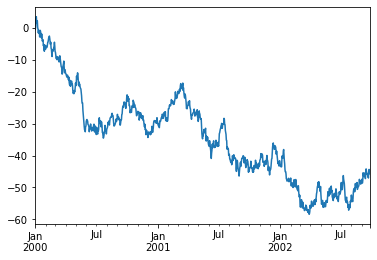

In [120]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

**DataFrame** 的 **plot()** 方法可以快速绘制**所有带标签的列**：

<AxesSubplot:>

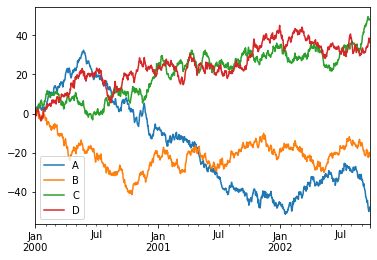

In [121]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

## 数据输入 / 输出

In [122]:
!mkdir -p ./output

### CSV

写入 **CSV** 文件。

In [123]:
df.to_csv('./output/foo.csv')

读取 **CSV** 文件数据：

In [124]:
pd.read_csv('./output/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.848627,1.123935,0.408968,1.329973
1,2000-01-02,2.419929,-0.865967,0.023155,0.749716
2,2000-01-03,1.044419,0.154778,0.046223,-0.365426
3,2000-01-04,2.341919,-0.033518,2.745491,-1.104936
4,2000-01-05,2.295092,-0.021198,2.739857,1.398470
...,...,...,...,...,...
995,2002-09-22,-49.949807,-21.329828,47.811621,37.620986
996,2002-09-23,-48.987834,-21.057788,47.944925,38.546160
997,2002-09-24,-49.260773,-19.846137,47.843083,36.792958
998,2002-09-25,-47.768799,-20.996826,47.824115,36.564955


### HDF5

写入 **HDF5 Store**：

In [125]:
help(df.to_hdf)

Help on method to_hdf in module pandas.core.generic:

to_hdf(path_or_buf, key: 'str', mode: 'str' = 'a', complevel: 'int | None' = None, complib: 'str | None' = None, append: 'bool_t' = False, format: 'str | None' = None, index: 'bool_t' = True, min_itemsize: 'int | dict[str, int] | None' = None, nan_rep=None, dropna: 'bool_t | None' = None, data_columns: 'bool_t | list[str] | None' = None, errors: 'str' = 'strict', encoding: 'str' = 'UTF-8') -> 'None' method of pandas.core.frame.DataFrame instance
    Write the contained data to an HDF5 file using HDFStore.
    
    Hierarchical Data Format (HDF) is self-describing, allowing an
    application to interpret the structure and contents of a file with
    no outside information. One HDF file can hold a mix of related objects
    which can be accessed as a group or as individual objects.
    
    In order to add another DataFrame or Series to an existing HDF file
    please use append mode and a different a key.
    
    .. warning::
    


In [126]:
df.to_hdf('./output/foo.h5', 'df')

读取 **HDF5 Store**：

In [127]:
pd.read_hdf('./output/foo.h5', 'df')

,A,B,C,D
2000-01-01,1.848627,1.123935,0.408968,1.329973
2000-01-02,2.419929,-0.865967,0.023155,0.749716
2000-01-03,1.044419,0.154778,0.046223,-0.365426
2000-01-04,2.341919,-0.033518,2.745491,-1.104936
2000-01-05,2.295092,-0.021198,2.739857,1.398470
...,...,...,...,...
2002-09-22,-49.949807,-21.329828,47.811621,37.620986
2002-09-23,-48.987834,-21.057788,47.944925,38.546160
2002-09-24,-49.260773,-19.846137,47.843083,36.792958
2002-09-25,-47.768799,-20.996826,47.824115,36.564955


### Excel

写入 **Excel** 文件：

In [128]:
df.to_excel('./output/foo.xlsx', sheet_name='Sheet1')

读取 **Excel** 文件：

In [129]:
pd.read_excel('./output/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.848627,1.123935,0.408968,1.329973
1,2000-01-02,2.419929,-0.865967,0.023155,0.749716
2,2000-01-03,1.044419,0.154778,0.046223,-0.365426
3,2000-01-04,2.341919,-0.033518,2.745491,-1.104936
4,2000-01-05,2.295092,-0.021198,2.739857,1.398470
...,...,...,...,...,...
995,2002-09-22,-49.949807,-21.329828,47.811621,37.620986
996,2002-09-23,-48.987834,-21.057788,47.944925,38.546160
997,2002-09-24,-49.260773,-19.846137,47.843083,36.792958
998,2002-09-25,-47.768799,-20.996826,47.824115,36.564955


## 各种坑（Gotchas）

执行某些操作，将**触发异常**，如:

In [130]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [131]:
pd.Series([False, True, False])

0    False
1     True
2    False
dtype: bool